## August Data Jam
---------------------------------------------------------------------------
### "Mapping who won the primary for President of USA in each major party by county"
----------------------------------------------------------------------------
#####       Combined & Lightly Cleaned Version, Data Exploration & Mapping

### Justin Gosses & Yulan I. Linn - August 2016

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
%matplotlib inline

In [3]:
#read in the data as pandas dataframes
county_facts = pd.read_csv("../data-jam-august-2016-master/csv/county_facts.csv")
primary_results = pd.read_csv("../data-jam-august-2016-master/csv/primary_results.csv")

In [4]:
candidates = list(primary_results.candidate.unique())
candidateDFs = {}
for politician in candidates:
    tempKey = politician.strip().lower().replace(' ', '_')
    tempResult = primary_results.iloc[:,3:][primary_results.iloc[:,3:].candidate==politician]
    candidateDFs[tempKey]= tempResult

In [5]:
complete_frame = county_facts

In [14]:
for politician in candidateDFs:
    tempDF = candidateDFs[politician].iloc[:,(0,3)]
    colnames = ['fips1']
    colnames.append(politician)
    tempDF.columns = colnames
    fips_series = tempDF.loc[:,'fips1'].dropna().astype('int').to_frame()
    fips_series.columns=['fips']
    tempDF = tempDF.join(fips_series).iloc[:,1:]
    complete_frame1 = pd.merge(complete_frame, tempDF, on=['fips'], how='left')
    complete_frame = complete_frame1

In [62]:
complete_frame.describe()

/Users/ylin11/Code/Sandbox/EverythingSandbox/lib/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,fips,Pop_2014_count,Pop_2010_base_count,Pop_change_pct,Pop_2010_count,Age_under_5_pct,Age_under_18_pct,Age_over_65_pct,Sex_female_pct,Race_white_pct,...,marco_rubio,ted_cruz,bernie_sanders_y,no_preference,ben_carson,donald_trump,rand_paul,chris_christie,john_kasich,jeb_bush
count,3195.000000,3.195000e+03,3.195000e+03,3195.000000,3.195000e+03,3195.000000,3195.000000,3195.000000,3195.000000,3195.000000,...,1890.000000,2711.000000,2798.000000,0.0,1022.000000,2711.000000,99.000000,99.000000,2711.000000,145.000000
mean,30358.079499,2.993963e+05,2.899137e+05,0.508545,2.899019e+05,5.900782,22.545290,17.524632,49.913271,84.953271,...,1650.413757,2714.800812,3692.927806,NaN,525.266145,4632.818886,85.646465,33.171717,1410.358539,435.179310
std,15181.225584,5.768468e+06,5.584181e+06,4.180066,5.583955e+06,1.211925,3.418896,4.433712,2.425066,16.290780,...,5111.611361,6242.384644,13059.531786,NaN,974.712369,9967.092053,203.405863,86.009496,4775.271461,1070.178695
min,0.000000,0.000000e+00,0.000000e+00,-17.000000,8.200000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,2.000000,1.000000,0.000000,2.000000
25%,18172.000000,1.113450e+04,1.129500e+04,-1.900000,1.129500e+04,5.200000,20.500000,14.700000,49.500000,80.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,29175.000000,2.655300e+04,2.644600e+04,-0.100000,2.642400e+04,5.800000,22.500000,17.200000,50.400000,91.900000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,45076.000000,7.247600e+04,7.150450e+04,2.300000,7.144800e+04,6.500000,24.200000,19.800000,51.100000,95.900000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,56045.000000,3.188571e+08,3.087581e+08,72.900000,3.087455e+08,13.700000,42.000000,52.900000,56.800000,99.300000,...,111898.000000,147721.000000,434656.000000,NaN,9945.000000,179130.000000,1633.000000,745.000000,101217.000000,6548.000000


In [20]:
frac_frame = county_facts
for politician in candidateDFs:
    tempDF = candidateDFs[politician].iloc[:,(0,4)]
    colnames = ['fips1']
    colnames.append(politician)
    tempDF.columns = colnames
    fips_series = tempDF.loc[:,'fips1'].dropna().astype('int').to_frame()
    fips_series.columns=['fips']
    tempDF = tempDF.join(fips_series).iloc[:,1:]
    frac_frame = pd.merge(frac_frame, tempDF, on=['fips'], how='left')

In [38]:
complete_frame.loc[:,("fips", "state_abbreviation", "area_name","Revenue_retail", 'Business_black_owned_pct')].to_csv(path_or_buf='vincent_try_1.csv')

In [43]:
dem_candidates = list(primary_results[primary_results.party=="Democrat"].candidate.unique())
rep_candidates = list(primary_results[primary_results.party=="Republican"].candidate.unique())

In [46]:
dem_frame = county_facts
for politician in dem_candidates:
    politician = politician.strip().lower().replace(' ', '_')
    tempDF = candidateDFs[politician].iloc[:,(0,3)]
    colnames = ['fips1']
    colnames.append(politician)
    tempDF.columns = colnames
    fips_series = tempDF.loc[:,'fips1'].dropna().astype('int').to_frame()
    fips_series.columns=['fips']
    tempDF = tempDF.join(fips_series).iloc[:,1:]
    complete_frame1 = pd.merge(dem_frame, tempDF, on=['fips'], how='left')
    dem_frame = complete_frame1

In [47]:
rep_frame = county_facts
for politician in rep_candidates:
    politician = politician.strip().lower().replace(' ', '_')
    tempDF = candidateDFs[politician].iloc[:,(0,3)]
    colnames = ['fips1']
    colnames.append(politician)
    tempDF.columns = colnames
    fips_series = tempDF.loc[:,'fips1'].dropna().astype('int').to_frame()
    fips_series.columns=['fips']
    tempDF = tempDF.join(fips_series).iloc[:,1:]
    complete_frame1 = pd.merge(rep_frame, tempDF, on=['fips'], how='left')
    rep_frame = complete_frame1

In [69]:
dem_winners = dem_frame.iloc[:,54:].idxmax(axis=1).to_frame()
dem_winners.columns = ['dem_winners']
dem_frame = dem_frame.join(dem_winners)

In [71]:
rep_winners = rep_frame.iloc[:,54:].idxmax(axis=1).to_frame()
rep_winners.columns = ['rep_winners']
rep_frame = rep_frame.join(rep_winners)

In [94]:
fips_winner_frame = pd.merge(rep_frame.iloc[:,(0,65)], dem_frame.iloc[:,(0,59)], on=['fips'])
master_winner_frame = pd.merge(fips_winner_frame, county_facts, on=['fips'])

In [102]:
pd.crosstab(master_winner_frame.dem_winners, master_winner_frame.state_abbreviation)

state_abbreviation,AL,AR,AZ,CA,CO,DE,FL,GA,HI,IA,...,SC,SD,TN,TX,UT,VA,WA,WI,WV,WY
dem_winners,,,,,,,,,,,,,,,,,,,,,
bernie_sanders,0,2,1,20,51,0,9,1,4,40,...,0,25,3,15,29,16,39,71,55,18
hillary_clinton,67,73,14,38,13,3,58,158,0,59,...,46,41,92,239,0,117,0,1,0,5


In [104]:
master_winner_frame.to_csv(path_or_buf="master-with-winner.csv")

# MAP STARTS NOW

#### - bringing in the main libraries

In [1]:
import geopandas as gp
import pandas as pd
import pysal as ps 
%matplotlib inline 

### Bringing in the GeoJSON file & Plotting

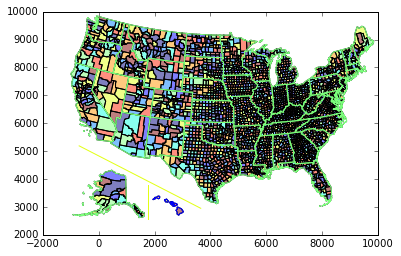

In [2]:
#us-all-all-highres.geo.json
import geopandas as gp
%matplotlib inline 
counties_all = gp.GeoDataFrame.from_file('us-all-all-highres.geo.json')
counties_all.plot()

### Looking at the same GeoJSON as a GeoDataFrame

In [3]:
## bringing in the geoJSON to be used and displaying in map form
map_counties = gp.GeoDataFrame.from_file('us-all-all-highres.geo.json')
map_counties

,fips,geometry,hc-a2,hc-group,hc-key,hc-middle-x,hc-middle-y,id,name
0,06083,"(POLYGON ((-422 5749, -422 5745, -425 5743, -4...",SB,admin2,us-ca-083,0.21,0.27,US.CA.083,Santa Barbara
1,06111,"(POLYGON ((-538 5722, -524 5706, -547 5712, -5...",VE,admin2,us-ca-111,0.48,0.26,US.CA.111,Ventura
2,06037,"(POLYGON ((-359 5610, -321 5543, -338 5543, -3...",LA,admin2,us-ca-037,0.52,0.20,US.CA.037,Los Angeles
3,44009,"(POLYGON ((9288 7745, 9279 7744, 9282 7765, 92...",WA,admin2,us-ri-009,0.47,0.40,US.RI.009,Washington
4,12087,"(POLYGON ((8015 3042, 8011 3037, 7998 3031, 80...",MO,admin2,us-fl-087,0.54,0.43,US.FL.087,Monroe
5,53069,"(POLYGON ((-346 9149, -356 9154, -362 9164, -3...",WA,admin2,us-wa-069,0.45,0.52,US.WA.069,Wahkiakum
6,26089,"(POLYGON ((6379 8210, 6370 8212, 6373 8220, 63...",LE,admin2,us-mi-089,0.28,0.87,US.MI.089,Leelanau
7,26003,"(POLYGON ((6241 8586, 6235 8579, 6228 8599, 62...",AL,admin2,us-mi-003,0.52,0.54,US.MI.003,Alger
8,25001,"(POLYGON ((9554 7930, 9551 7928, 9552 7957, 95...",BA,admin2,us-ma-001,0.90,0.45,US.MA.001,Barnstable
9,12086,"(POLYGON ((8343 3324, 8343 3344, 8346 3346, 83...",MD,admin2,us-fl-086,0.58,0.51,US.FL.086,Miami-Dade


### Brining in the CSV file that has the primary election information as a Pandas Data Frame


In [4]:
#map_counties.
#type(df['colname'])
(map_counties['fips'].head())

0    06083
1    06111
2    06037
3    44009
4    12087
Name: fips, dtype: object

In [5]:
## Bringing in cleaned political results and county data CSV from Yulan's earlier Jupyter Noteboom
data_p = pd.read_csv('master-with-winner.csv')
data_p

,Unnamed: 0,fips,rep_winners,dem_winners,area_name,state_abbreviation,Pop_2014_count,Pop_2010_base_count,Pop_change_pct,Pop_2010_count,...,Business_hispanic_owned_pct,Business_female_owned_pct,Revenue_manufacture,Revenue_wholesaler,Revenue_retail,Revenue_retail_per_capita,Revenue_food_and_hospitality,Building_permits,Land_area,Pop_density
0,0,0,NaN,NaN,United States,NaN,318857056,308758105,3.3,308745538,...,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1,1000,NaN,NaN,Alabama,NaN,4849377,4780127,1.4,4779736,...,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,2,1001,donald_trump,hillary_clinton,Autauga County,AL,55395,54571,1.5,54571,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,3,1003,donald_trump,hillary_clinton,Baldwin County,AL,200111,182265,9.8,182265,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,4,1005,donald_trump,hillary_clinton,Barbour County,AL,26887,27457,-2.1,27457,...,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0
5,5,1007,donald_trump,hillary_clinton,Bibb County,AL,22506,22919,-1.8,22915,...,0.0,0.0,0,0,124707,5804,10757,19,622.58,36.8
6,6,1009,donald_trump,hillary_clinton,Blount County,AL,57719,57322,0.7,57322,...,0.0,23.2,341544,0,319700,5622,20941,3,644.78,88.9
7,7,1011,donald_trump,hillary_clinton,Bullock County,AL,10764,10915,-1.4,10914,...,0.0,38.8,0,0,43810,3995,3670,1,622.81,17.5
8,8,1013,donald_trump,hillary_clinton,Butler County,AL,20296,20946,-3.1,20947,...,0.0,0.0,399132,56712,229277,11326,28427,2,776.83,27.0
9,9,1015,donald_trump,hillary_clinton,Calhoun County,AL,115916,118586,-2.3,118572,...,0.5,24.7,2679991,0,1542981,13678,186533,114,605.87,195.7


In [6]:
(data_p['fips'].head())

0       0
1    1000
2    1001
3    1003
4    1005
Name: fips, dtype: int64

### Changing the data type of the 'fips' column such that 'fips' is the same data type in both files, which is necessary for the upcoming merge

In [7]:
##### cleaning up the 'fips' column as the different dataframes have it as different data types, which Pandas does not like.
fips_series = map_counties.loc[:,'fips'].dropna().astype('int').to_frame()
fips_series.columns=['fips']
fips_series.head()




,fips
0,6083
1,6111
2,6037
3,44009
4,12087


In [8]:
map_counties['fips'] = fips_series
map_counties['fips'].head()

0     6083.0
1     6111.0
2     6037.0
3    44009.0
4    12087.0
Name: fips, dtype: float64

In [9]:
fips_series = data_p.loc[:,'fips'].dropna().astype('float').to_frame()
fips_series.columns=['fips']
#map_counties['fips']
#fips_series
data_p['fips'] = fips_series
data_p['fips'].head()

0       0.0
1    1000.0
2    1001.0
3    1003.0
4    1005.0
Name: fips, dtype: float64

### Merging the GeoDataFrame and the DataFrame into a single GeoDataFrame

In [10]:
country_shapes = map_counties.merge(data_p, on='fips')
country_shapes

,fips,geometry,hc-a2,hc-group,hc-key,hc-middle-x,hc-middle-y,id,name,Unnamed: 0,...,Business_hispanic_owned_pct,Business_female_owned_pct,Revenue_manufacture,Revenue_wholesaler,Revenue_retail,Revenue_retail_per_capita,Revenue_food_and_hospitality,Building_permits,Land_area,Pop_density
0,6083.0,"(POLYGON ((-422 5749, -422 5745, -425 5743, -4...",SB,admin2,us-ca-083,0.21,0.27,US.CA.083,Santa Barbara,233,...,13.9,28.3,3174119,4023586,4983368,12443,1361476,755,2735.09,155.0
1,6111.0,"(POLYGON ((-538 5722, -524 5706, -547 5712, -5...",VE,admin2,us-ca-111,0.48,0.26,US.CA.111,Ventura,247,...,15.0,28.8,8769037,0,11083611,14036,1478160,1314,1843.13,446.7
2,6037.0,"(POLYGON ((-359 5610, -321 5543, -338 5543, -3...",LA,admin2,us-ca-037,0.52,0.20,US.CA.037,Los Angeles,210,...,21.6,30.2,153343705,198435837,119111840,12236,20238148,17659,4057.88,2419.6
3,44009.0,"(POLYGON ((9288 7745, 9279 7744, 9282 7765, 92...",WA,admin2,us-ri-009,0.47,0.40,US.RI.009,Washington,2356,...,1.0,26.0,1756988,1453151,1726691,13619,272795,251,329.24,385.7
4,12087.0,"(POLYGON ((8015 3042, 8011 3037, 7998 3031, 80...",MO,admin2,us-fl-087,0.54,0.43,US.FL.087,Monroe,374,...,0.0,24.7,0,0,1387603,18900,748100,188,983.28,74.3
5,53069.0,"(POLYGON ((-346 9149, -356 9154, -362 9164, -3...",WA,admin2,us-wa-069,0.45,0.52,US.WA.069,Wahkiakum,3037,...,0.0,0.0,0,0,11743,2947,1849,11,263.38,15.1
6,26089.0,"(POLYGON ((6379 8210, 6370 8212, 6373 8220, 63...",LE,admin2,us-mi-089,0.28,0.87,US.MI.089,Leelanau,1299,...,0.0,27.1,0,17144,128208,5857,40646,113,347.17,62.5
7,26003.0,"(POLYGON ((6241 8586, 6235 8579, 6228 8599, 62...",AL,admin2,us-mi-003,0.52,0.54,US.MI.003,Alger,1256,...,0.0,0.0,193878,0,54386,5636,14239,28,915.07,10.5
8,25001.0,"(POLYGON ((9554 7930, 9551 7928, 9552 7957, 95...",BA,admin2,us-ma-001,0.90,0.45,US.MA.001,Barnstable,1240,...,0.0,28.3,533264,0,3973206,17878,890997,640,393.72,548.3
9,12086.0,"(POLYGON ((8343 3324, 8343 3344, 8346 3346, 83...",MD,admin2,us-fl-086,0.58,0.51,US.FL.086,Miami-Dade,373,...,60.5,28.9,9347116,60760055,34530470,14074,6005856,7731,1897.72,1315.5


In [11]:
list(country_shapes.columns.values)

['fips',
 'geometry',
 'hc-a2',
 'hc-group',
 'hc-key',
 'hc-middle-x',
 'hc-middle-y',
 'id',
 'name',
 'Unnamed: 0',
 'rep_winners',
 'dem_winners',
 'area_name',
 'state_abbreviation',
 'Pop_2014_count',
 'Pop_2010_base_count',
 'Pop_change_pct',
 'Pop_2010_count',
 'Age_under_5_pct',
 'Age_under_18_pct',
 'Age_over_65_pct',
 'Sex_female_pct',
 'Race_white_pct',
 'Race_black_pct',
 'Race_native_pct',
 'Race_asian_pct',
 'Race_island_pct',
 'Race_mixed_pct',
 'Race_hispanic_pct',
 'Race_white_not_hispanic_pct',
 'Pop_same_house_pct',
 'Pop_foreign_born_pct',
 'Pop_nonenglish_home_pct',
 'Pop_hs_grad_pct',
 'Pop_college_grad_pct',
 'Pop_veterans_count',
 'Pop_avg_commute_mins',
 'House_unit_count',
 'House_owner_pct',
 'House_unit_multi_count',
 'House_median_value',
 'House_household_count',
 'House_avg_persons_per_count',
 'Income_per_capita',
 'Income_median_per_household',
 'Pop_poverty',
 'Business_establishment_count',
 'Business_employee_count',
 'Business_employee_change_pct',

### Now I want to see who won the democratic and republic primaries on a county by county basis across the US instead of the normal "state by state" view.

#### To do this, I'll need to change the republican and democratic primary winner in each county from a string to a data type that can be ordered. 

### Preping data for Visualizing Democratic Primary Winner By County
##### - found unique set of Republican county winners
##### - turned that set of strings into a set of numbers as the plotting function doesn't work well with un-ordered information 

In [13]:
country_shapes.dem_winners.unique()

array(['hillary_clinton', nan, 'bernie_sanders'], dtype=object)

In [14]:
dem_key = {'hillary_clinton':1, 'nan' :0, 'bernie_sanders':2}

country=country_shapes.replace({'dem_winners': dem_key})
# for row in country_shapes:
#     row['dem_winners'] = dem_key[row['dem_winners']]
    
country['dem_winners'].fillna(0).head()

0    1.0
1    1.0
2    1.0
3    0.0
4    1.0
Name: dem_winners, dtype: float64

In [15]:
dem_key = {'hillary_clinton':1, 'nan' :0, 'bernie_sanders':2}

country=country_shapes.replace({'dem_winners': dem_key})
# for row in country_shapes:
#     row['dem_winners'] = dem_key[row['dem_winners']]
    
country['dem_winners'].fillna(0).head()

0    1.0
1    1.0
2    1.0
3    0.0
4    1.0
Name: dem_winners, dtype: float64

##### dem_key = {'hillary_clinton':1, 'nan' :0, 'bernie_sanders':2}

### Visualizing Democratic Primary Winner By County on Chloropeth Map
##### - tried a few color maps and line styles
##### - couldn't get a legend to work out well

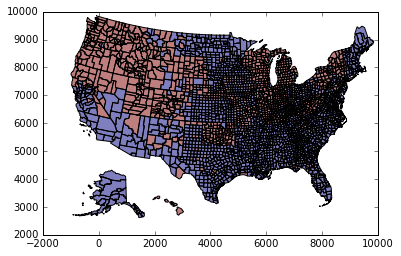

In [16]:
country.plot(column='dem_winners')

#### The map above was a little hard to see, so I tried changing the line widths

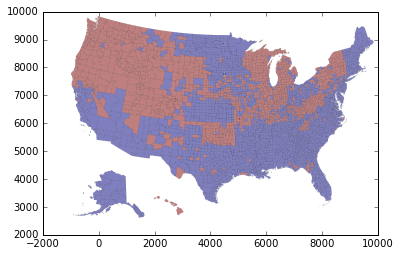

In [17]:
fig = country.plot(column='dem_winners', linewidth=0.05)

#### Little better..... but still needs to be bigger



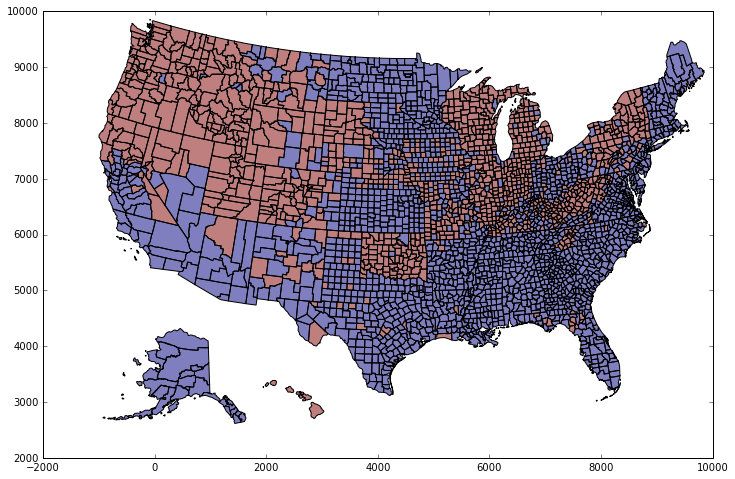

In [18]:
country.plot(column='dem_winners', figsize=(12, 10))

#### Explored a few colorbar options, liked this one

## Bernie Sanders = Yellow
## Hillary Clinton = Blue

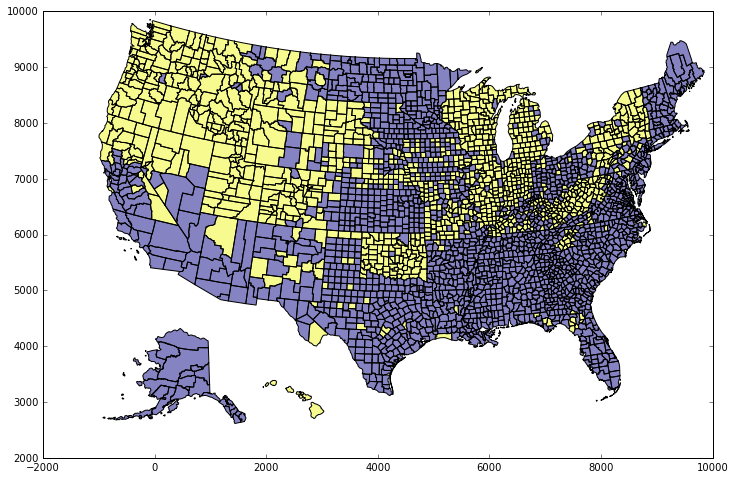

In [19]:
country.plot(column='dem_winners', figsize=(12, 10), cmap="plasma")

### Preping data for Visualizing Republican Primary Winner By County
##### - found unique set of Republican county winners
##### - turned that set of strings into a set of numbers as the plotting function doesn't work well with un-ordered information 

In [20]:
rep_winners_unique = country_shapes.rep_winners.unique()
rep_winners_unique 

array(['donald_trump', nan, 'marco_rubio', 'ted_cruz', 'john_kasich',
       'ben_carson'], dtype=object)

In [21]:
rep_key = {'donald_trump':1, 'nan' :0, 'marco_rubio':2, 'ted_cruz':3, 'john_kasich':4, 'ben_carson':5}

country=country_shapes.replace({'rep_winners': rep_key})
# for row in country_shapes:
#     row['dem_winners'] = dem_key[row['dem_winners']]
    
country['rep_winners'].fillna(0).head()

0    1.0
1    1.0
2    1.0
3    0.0
4    1.0
Name: rep_winners, dtype: float64

### Visualizing Republican Primary Winner By County
##### - tried a few color maps and line styles
##### - couldn't get a legend to work out well

## Donald Trump = Light Blue
## Ted Cruz = Peach
## John Kasich = Purple
## Marco Rubio = Green
## Ben Carson = no counties?


rep_key = {'donald_trump':1, 'nan' :0, 'marco_rubio':2, 'ted_cruz':3, 'john_kasich':4, 'ben_carson':5}

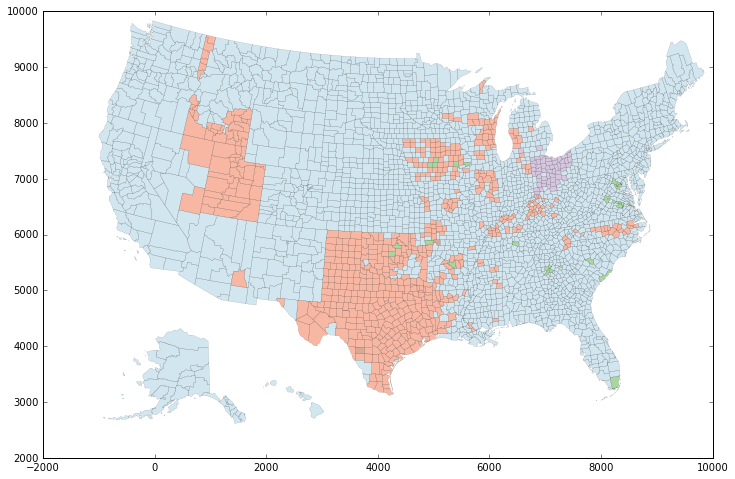

In [22]:
country.plot(column='rep_winners', figsize=(12, 10), cmap="Paired", linewidth=0.08)

##### trying to add a colorbar but ran out of time